In [4]:
## load data
import csv
import numpy as np

N_images = 1000 # the number of images used for evaluation

# initialize group ids
dfs_ids = [] # defensers' ids
ntg_atks_ids = [] # non-targeted attackers' ids
tg_atks_ids = [] # targeted attackers' ids

# read the accuracy matrix
acc = []
with open('accuracy_matrix.csv') as csvfile:
    file = csv.reader(csvfile)
    n_dfs = -1
    for row in file:
        n_dfs += 1 # the number of defenses
        if n_dfs == 0:
            ntg_atks_ids = row[1:] # first row gives attackers' ids
            n_atks = len(ntg_atks_ids) # the number of attackers
            n_ntg_atks = ntg_atks_ids.index('baseline_randnoise') + 1 # the number of non-targeted attackers
            n_tg_atks = n_atks - n_ntg_atks # the number of targeted attackers
            tg_atks_ids = ntg_atks_ids[n_ntg_atks:]
            ntg_atks_ids = ntg_atks_ids[:n_ntg_atks]
        else:
            acc.append(row[1:])
            dfs_ids.append(row[0])
acc = np.array(acc, dtype=int)

# convert baseline ids to numerics
bl_dfs_ids = {'baseline_adv_inception_v3': 999110,
              'baseline_ens_adv_inception_renset_v2': 999111,
              'baseline_inceptionv3': 999112}
bl_ntg_atks_ids = {'baseline_fgsm': 999120,
                   'baseline_noop': 999121,
                   'baseline_randnoise': 999122}
bl_tg_atks_ids = {'baseline_itertc_10': 999130,
                  'baseline_itertc_20': 999131,
                  'baseline_steptc': 999132}

# convert string ids to numeric ids
dfs_ids = np.array([int(i) if i not in bl_dfs_ids else bl_dfs_ids[i] for i in dfs_ids])
ntg_atks_ids = np.array([int(i) if i not in bl_ntg_atks_ids else bl_ntg_atks_ids[i] for i in ntg_atks_ids])
tg_atks_ids = np.array([int(i) if i not in bl_tg_atks_ids else bl_tg_atks_ids[i] for i in tg_atks_ids])

# read the error matrix
err = []
with open('error_matrix.csv') as csvfile:
    file = csv.reader(csvfile)
    i = -1
    for row in file:
        i += 1
        if i == 0:
            continue # skip header
        else:
            err.append(row[1:])
err = np.array(err, dtype=int)

# read the hit target class matrix
hit_target = []
with open('hit_target_class_matrix.csv') as csvfile:
    file = csv.reader(csvfile)
    i = -1
    for row in file:
        i += 1
        if i == 0:
            continue # skip header
        else:
            hit_target.append(row[1:])
hit_target = np.array(hit_target, dtype=int)

# read the defense results
T_dfs = {}
with open('defense_results.csv') as csvfile:
    file = csv.reader(csvfile)
    i = -1
    for row in file:
        i += 1
        if i == 0:
            entries = row
            for entry in entries: # initialize dict entries as table columns
                T_dfs[entry] = []
        else:
            for j, entry in zip(range(len(entries)), entries):
                if entry == 'KaggleTeamId' and row[j] in bl_dfs_ids:
                    T_dfs[entry].append(bl_dfs_ids[row[j]]) # convert baseline names to ids
                    T_dfs['TeamName'].append(row[j]) # add the corresponding baseline names to where its empty
                elif entry == 'TeamName' and row[j] =='': # skip empty baseline team name already corrected
                    continue
                elif entry in ['Score', 'NormalizedScore', 'MinEvalTime', 'MaxEvalTime', 'MedianEvalTime', 'MeanEvalTime'] and\
                row[j] == '':
                    T_tg_atks[entry].append('0')
                else:
                    T_dfs[entry].append(row[j])

# read the non-targeted attack results
T_ntg_atks = {}
with open('non_targeted_attack_results.csv') as csvfile:
    file = csv.reader(csvfile)
    i = -1
    for row in file:
        i += 1
        if i == 0:
            entries = row
            for entry in entries: # initialize dict entries as table columns
                T_ntg_atks[entry] = []
        else:
            for j, entry in zip(range(len(entries)), entries):
                if entry == 'KaggleTeamId' and row[j] in bl_ntg_atks_ids:
                    T_ntg_atks[entry].append(bl_ntg_atks_ids[row[j]]) # convert baseline names to ids
                    T_ntg_atks['TeamName'].append(row[j]) # add the corresponding baseline names to where its empty
                elif entry == 'TeamName' and row[j] =='': # skip empty baseline team name already corrected
                    continue
                elif entry in ['Score', 'NormalizedScore', 'MinEvalTime', 'MaxEvalTime', 'MedianEvalTime', 'MeanEvalTime'] and\
                row[j] == '':
                    T_tg_atks[entry].append('0')
                else:
                    T_ntg_atks[entry].append(row[j])

# read the defense results
T_tg_atks = {}
with open('targeted_attack_results.csv') as csvfile:
    file = csv.reader(csvfile)
    i = -1
    for row in file:
        i += 1
        if i == 0:
            entries = row
            for entry in entries: # initialize dict entries as table columns
                T_tg_atks[entry] = []
        else:
            for j, entry in zip(range(len(entries)), entries):
                if entry == 'KaggleTeamId' and row[j] in bl_tg_atks_ids:
                    T_tg_atks[entry].append(bl_tg_atks_ids[row[j]]) # convert baseline names to ids
                    T_tg_atks['TeamName'].append(row[j]) # add the corresponding baseline names to where its empty
                elif entry == 'TeamName' and row[j] =='': # skip empty baseline team name already corrected
                    continue
                elif entry in ['Score', 'NormalizedScore', 'MinEvalTime', 'MaxEvalTime', 'MedianEvalTime', 'MeanEvalTime'] and\
                row[j] == '':
                    T_tg_atks[entry].append('0')
                else:
                    T_tg_atks[entry].append(row[j])

# type conversion in tables
for table in [T_dfs, T_ntg_atks, T_tg_atks]:
    table['KaggleTeamId'] = np.array(table['KaggleTeamId'], dtype=int)
    table['Score'] = np.array(table['Score'], dtype=float)
    table['Score'] = np.array(table['Score'], dtype=int)
    table['NormalizedScore'] = np.array(table['NormalizedScore'], dtype=float)
    table['MinEvalTime'] = np.array(table['MinEvalTime'], dtype=float)
    table['MaxEvalTime'] = np.array(table['MaxEvalTime'], dtype=float)
    table['MedianEvalTime'] = np.array(table['MedianEvalTime'], dtype=float)
    table['MeanEvalTime'] = np.array(table['MeanEvalTime'], dtype=float)

# fill-in teams without results
for team_ids, table in [[dfs_ids, T_dfs], [ntg_atks_ids, T_ntg_atks], [tg_atks_ids,T_tg_atks]]:
    for team_id in team_ids:
        if team_id not in table['KaggleTeamId']:
            print('Adding entry for team id: ' + str(team_id))
            table['KaggleTeamId'] = np.append(table['KaggleTeamId'], team_id)
            table['TeamName'] = np.append(table['TeamName'], '_')
            table['Score'] = np.append(table['Score'], 0)
            table['NormalizedScore'] = np.append(table['NormalizedScore'], 0)
            table['MinEvalTime'] = np.append(table['MinEvalTime'], 0)
            table['MaxEvalTime'] = np.append(table['MaxEvalTime'], 0)
            table['MedianEvalTime'] = np.append(table['MedianEvalTime'], 0)
            table['MeanEvalTime'] = np.append(table['MeanEvalTime'], 0)

NameError: name 'T_tg_atks' is not defined

In [21]:
## give special team names based on evaluated images and times
total = acc + err # total evaluated images for each pair of attack and defense, should equal N_images

dfs_rows = np.zeros(np.shape(dfs_ids), dtype=int)
i_dfs_ids = np.argsort(dfs_ids)
i_T_dfs_ids = np.argsort(T_dfs['KaggleTeamId'])
dfs_rows[i_T_dfs_ids] = i_dfs_ids
row_incomplete = np.where(np.max(total,axis=1) < N_images)[0]
for j in row_incomplete:
    indj = np.where(dfs_rows == j)[0][0]
    T_dfs['TeamName'][indj] = str(np.max(total[j,:])) + ' ' + T_dfs['TeamName'][indj]
for j in range(n_dfs):
    if T_dfs['NormalizedScore'][j] < 0:
        T_dfs['TeamName'][j] = '--- ' + T_dfs['TeamName'][j]

ntg_atks_cols = np.zeros(np.shape(ntg_atks_ids), dtype=int)
i_ntg_atks_ids = np.argsort(ntg_atks_ids)
i_T_ntg_atks_ids = np.argsort(T_ntg_atks['KaggleTeamId'])
ntg_atks_cols[i_T_ntg_atks_ids] = i_ntg_atks_ids
col_incomplete = np.where(np.max(total, axis=0) < N_images)[0]
for j in col_incomplete:
    if j < n_ntg_atks:
        indj =  np.where(ntg_atks_cols == j)[0][0]
        if indj < n_ntg_atks:
            T_ntg_atks['TeamName'][indj] = str(np.max(total[:,j])) + ' ' + T_ntg_atks['TeamName'][indj]
for j in range(n_ntg_atks):
    if T_ntg_atks['NormalizedScore'][j] < 0:
        T_ntg_atks['TeamName'][j] = '---' + T_ntg_atks['TeamName'][j]

tg_atks_cols = np.zeros(np.shape(tg_atks_ids), dtype=int)
i_tg_atks_ids = np.argsort(tg_atks_ids)
i_T_tg_atks_ids = np.argsort(T_tg_atks['KaggleTeamId'])
tg_atks_cols[i_T_tg_atks_ids] = n_ntg_atks + i_tg_atks_ids
for j in col_incomplete:
    if j >= n_ntg_atks:
        indj =  np.where(tg_atks_cols == j)[0][0]
    if indj >= n_ntg_atks:
        T_tg_atks['TeamName'][indj] = str(np.max(total[:,j])) + ' ' + T_tg_atks['TeamName'][indj]
for j in range(n_tg_atks):
    if T_tg_atks['NormalizedScore'][j] < 0:
        T_tg_atks['TeamName'][j] = '---' + T_tg_atks['TeamName'][j]

ValueError: shape mismatch: value array of shape (97,) could not be broadcast to indexing result of shape (110,)

In [ ]:
## sort teams based on scores

# sort rows first for both non-target and target attacks agains the same defense
i_dfs_score = np.argsort(abs(T_dfs['NormalizedScore']))
ie2r = np.zeros(np.shape(dfs_ids), dtype=int)
i_dfs_ids = np.argsort(dfs_ids)
i_T_dfs_ids_score = np.argsort(T_dfs['KaggleTeamId'][i_dfs_score])
ie2r[i_T_dfs_ids_score] = i_dfs_ids
acc_sorted = acc[ie2r,:]
err_sorted = err[ie2r,:]
hit_target_sorted = hit_target[ie2r,:]

# sort columns for non-target and target attacks separately
acc_ntg = acc_sorted[:,:n_ntg_atks]
err_ntg = err_sorted[:,:n_ntg_atks]
err_tg = hit_target_sorted[:,n_ntg_atks:]
i_ntg_atks_score = np.argsort(abs(T_ntg_atks['NormalizedScore']))
ie2n = np.zeros(np.shape(ntg_atks_ids), dtype=int)
i_ntg_atks_ids = np.argsort(ntg_atks_ids)
i_T_ntg_atks_ids_score = np.argsort(T_ntg_atks['KaggleTeamId'][i_ntg_atks_score])
ie2n[i_T_ntg_atks_ids_score] = i_ntg_atks_ids

i_tg_atks_score = np.argsort(abs(T_tg_atks['NormalizedScore']))
ie2t = np.zeros(np.shape(tg_atks_ids), dtype=int)
i_tg_atks_ids = np.argsort(tg_atks_ids)
i_T_tg_atks_ids_score = np.argsort(T_tg_atks['KaggleTeamId'][i_tg_atks_score])
ie2t[i_T_tg_atks_ids_score] = i_tg_atks_ids
err_sorted = np.concatenate((err_ntg[:,ie2n], err_tg[:,ie2t]), axis=1)

In [2]:
## analysis of non-targeted attack vs. defense
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# initialize
# error matrix of non-targeted attack vs. defense, sorted
ens = np.array(err_ntg[:,ie2n], dtype=float)
# accuracy matrix of non-targeted attack vs. defense | hit target class matrix of targeted attack vs. defense, sorted
ans = np.array(np.concatenate((acc_ntg[:,ie2n], err_tg[:,ie2t]), axis=1), dtype=float)
ens_atk = StandardScaler().fit_transform(np.transpose(ens))
ans_df  = StandardScaler().fit_transform(             ans )

# perform PCA and clustering
atk_pca = PCA()
ens_atk_pca = atk_pca.fit_transform(ens_atk)
print('Attackers PCA variance explained ratio: ' + str(atk_pca.explained_variance_ratio_[:5]))

atk_km = KMeans(n_clusters=7)
ntg_atk_i = atk_km.fit_predict(ens_atk_pca)

df_pca  = PCA()
ans_df_pca = df_pca.fit_transform(ans_df)
print('Defensers PCA variance explained ratio: ' + str(df_pca.explained_variance_ratio_[:5]))

df_km = KMeans(n_clusters=7)
df_i = df_km.fit_predict(ans_df_pca)

cluster_colors = 'rgbymck'

NameError: name 'err_ntg' is not defined

In [ ]:
## show error matrix for non-targeted attacks and defenses, and hit target class matrix for targeted attacks and defenses
import matplotlib.pyplot as plt

# plot parameters
ftsz = 8 # font size to show team names
lw = 3 # widths of separating lines

# initialize plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])

# show separating lines
plt.plot(n_ntg_atks - np.array([0.5, 0.5]), np.array([-0.5, n_dfs + 0.5]), color='r', lineWidth=lw)
plt.plot(n_atks - np.array([0.5, 0.5]), np.array([-0.5, n_dfs + 0.5]), color='r', lineWidth=lw)
plt.plot(np.array([-0.5, n_atks+0.5]), n_dfs - np.array([0.5, 0.5]), color='r', lineWidth=lw)

# show defense teams names
row_names = [];
dfs_MET_sorted = np.zeros(np.shape(T_dfs['MedianEvalTime']))
for i in reversed(range(n_dfs)):
    new_id = np.where(ie2r == dfs_rows[i])[0][0]
    name = T_dfs['TeamName'][i]
    row_names.append(name)
    ax.text(-3, new_id, name, fontsize=ftsz, color=cluster_colors[df_i[n_dfs-i-1]],
            horizontalalignment='right', verticalalignment='center')
    dfs_MET_sorted[new_id] = T_dfs['MedianEvalTime'][i]
row_names.append('2x ATK MED TIME')
ax.text(-3, n_dfs, '2x ATK MED TIME', fontsize=ftsz,
        horizontalalignment='right', verticalalignment='center')

# show non-targeted attack teams names
col_names = [];
ntg_atks_MET_sorted = np.zeros(np.shape(T_ntg_atks['MedianEvalTime']))
for i in reversed(range(n_ntg_atks)):
    new_id = np.where(ie2n == ntg_atks_cols[i])[0][0]
    name = T_ntg_atks['TeamName'][i]
    col_names.append(name)
    ax.text(new_id, -1, name, fontsize=ftsz, color=cluster_colors[ntg_atk_i[n_ntg_atks-i-1]],
            rotation='vertical', verticalalignment='bottom', horizontalalignment='center')
    ntg_atks_MET_sorted[new_id] = T_ntg_atks['MedianEvalTime'][i]

# show targeted attack teams names
tg_atks_MET_sorted = np.zeros(np.shape(T_tg_atks['MedianEvalTime']))
for i in reversed(range(n_tg_atks)):
    new_id = np.where(ie2t == tg_atks_cols[i] - n_ntg_atks)[0][0]
    name = T_tg_atks['TeamName'][i]
    col_names.append(name)
    ax.text(n_ntg_atks + new_id, -1, name, fontsize=ftsz,
            rotation='vertical', verticalalignment='bottom', horizontalalignment='center')
    tg_atks_MET_sorted[new_id] = T_tg_atks['MedianEvalTime'][i]
col_names.append('2x DFS MED TIME')
ax.text(n_atks, -1, '2x DFS MED TIME', fontsize=ftsz,
        rotation='vertical', verticalalignment='bottom', horizontalalignment='center')

# show the error matrix, the hit target class matrix, and the median evaluation times
combined_matrix = np.concatenate((np.concatenate((err_sorted, dfs_MET_sorted[:,None]*2), axis=1),
                                  np.concatenate((ntg_atks_MET_sorted[None,:]*2,
                                                  tg_atks_MET_sorted[None,:]*2, np.array([0])[None]), axis=1)),
                                 axis=0)
plt.imshow(combined_matrix, cmap='jet', interpolation='none')
plt.colorbar()
plt.clim(0, N_images)

fig.savefig('Non-targeted_Error_Targeted_Hit_Matrix_cluster.png', bbox_inches='tight')
plt.show()

In [ ]:
## save the sorted combined matrix
with open('results.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow([''] + col_names)
    for row_name, row in zip(row_names, combined_matrix):
        writer.writerow([row_name] + list(row))

In [ ]:
## show PCs and cluster index
ntg_atk_names = col_names[:n_ntg_atks]
df_names = row_names[:-1]

scftsz = 100
scptsz = 2000

fig = plt.figure(figsize=(200,80))

ax1 = fig.add_subplot(121)
# plt.scatter(ens_atk_pca[:,0], ens_atk_pca[:,1], s=scptsz, c=range(n_ntg_atks))
for i in range(n_ntg_atks):
    plt.scatter(ens_atk_pca[i,0], ens_atk_pca[i,1], s=scptsz, c=cluster_colors[ntg_atk_i[i]])
    ax1.text(ens_atk_pca[i,0], ens_atk_pca[i,1], ntg_atk_names[i], fontsize=scftsz)
plt.title('non-targeted attackers')

ax2 = fig.add_subplot(122)
# plt.scatter(ans_df_pca[:,0], ans_df_pca[:,1], s=scptsz, c=range(n_dfs))
for i in range(n_dfs):
    plt.scatter(ans_df_pca[i,0], ans_df_pca[i,1], s=scptsz, c=cluster_colors[df_i[i]])
    ax2.text(ans_df_pca[i,0], ans_df_pca[i,1], df_names[i], fontsize=scftsz)
plt.title('defensers')

fig.savefig('non-targeted_attackers_vs_defensers_PCAs_cluster.png', bbox_inches='tight')
plt.show()

In [3]:
## cluster stats
import pandas as pd
import collections

# initialize pandas data frames
ens_all = pd.DataFrame(ens)
ens_all.index = df_names
ens_all.columns = ntg_atk_names
ans_all = pd.DataFrame(ans[:,:n_ntg_atks])
ans_all.index = df_names
ans_all.columns = ntg_atk_names

# remove invalid entries
ens_valid = ens_all.drop([x for x in ens_all.index if x[0].isdigit() or x[0]=='-'], axis=0)
ans_valid = ans_all.drop([x for x in ans_all.columns if x[0].isdigit() or x[0]=='-'], axis=1)
df_i_valid = [i for i, x in zip(df_i, ens_all.index) if not (x[0].isdigit() or x[0]=='-')]
ntg_atk_i_valid = [i for i, x in zip(ntg_atk_i, ans_all.columns) if not (x[0].isdigit() or x[0]=='-')]

# calculate counts in each cluster and within each normalized sums and means
ntg_atk_sums_all = ens_all.groupby(by=df_i, axis=0).sum()/N_images
ntg_atk_means_all = ens_all.groupby(by=df_i, axis=0).mean()/N_images
_, counts = np.unique(df_i, return_counts=True)
counts = counts.astype(float)
ntg_atk_sums_all['counts%'] = pd.Series(counts/sum(counts), index=ntg_atk_sums_all.index)
ntg_atk_means_all['counts%'] = pd.Series(counts/sum(counts), index=ntg_atk_means_all.index)

df_sums_all = ans_all.groupby(by=ntg_atk_i, axis=1).sum()/N_images
df_means_all = ans_all.groupby(by=ntg_atk_i, axis=1).mean()/N_images
_, counts = np.unique(ntg_atk_i, return_counts=True)
counts = counts.astype(float)
df_sums_all = df_sums_all.append(pd.DataFrame(counts[None,:]/sum(counts), index=['counts%'], columns=df_sums_all.columns))
df_means_all = df_means_all.append(pd.DataFrame(counts[None,:]/sum(counts), index=['counts%'], columns=df_means_all.columns))

ntg_atk_sums_valid = ens_valid.groupby(by=df_i_valid, axis=0).sum()/N_images
ntg_atk_means_valid = ens_valid.groupby(by=df_i_valid, axis=0).mean()/N_images
_, counts = np.unique(df_i_valid, return_counts=True)
counts = counts.astype(float)
ntg_atk_sums_valid['counts%'] = pd.Series(counts/sum(counts), index=ntg_atk_sums_valid.index)
ntg_atk_means_valid['counts%'] = pd.Series(counts/sum(counts), index=ntg_atk_means_valid.index)

df_sums_valid = ans_valid.groupby(by=ntg_atk_i_valid, axis=1).sum()/N_images
df_means_valid = ans_valid.groupby(by=ntg_atk_i_valid, axis=1).mean()/N_images
_, counts = np.unique(ntg_atk_i_valid, return_counts=True)
counts = counts.astype(float)
df_sums_valid = df_sums_valid.append(pd.DataFrame(counts[None,:]/sum(counts), index=['counts%'], columns=df_sums_valid.columns))
df_means_valid = df_means_valid.append(pd.DataFrame(counts[None,:]/sum(counts), index=['counts%'], columns=df_means_valid.columns))

NameError: name 'ens' is not defined

In [ ]:
## plot ntg_atk_means_all

# plot parameters
ftsz = 20 # font size to show team names

# initialize plot
fig = plt.figure(figsize=(40,2))
ax = fig.add_axes([0,0,1,1])

# labels
i = 0
for row in ntg_atk_means_all.index:
    ax.text(-3, i, row, fontsize=ftsz, color=cluster_colors[row],
            horizontalalignment='right', verticalalignment='center')
    i += 1

j = 0
for column in ntg_atk_means_all.columns[:-1]:
    ax.text(j, -1, column, fontsize=ftsz, color=cluster_colors[ntg_atk_i[j]],
        rotation='vertical', verticalalignment='bottom', horizontalalignment='center')
    j += 1
ax.text(j, -1, 'counts%', fontsize=ftsz, color='k',
        rotation='vertical', verticalalignment='bottom', horizontalalignment='center')

# data
plt.imshow(ntg_atk_means_all, cmap='jet', interpolation='none')
plt.colorbar()
plt.clim(0, 1)

fig.savefig('ntg_atk_means_all.png', bbox_inches='tight')
plt.show()

In [ ]:
## plot df_means_all

# plot parameters
ftsz = 20 # font size to show team names

# initialize plot
fig = plt.figure(figsize=(2,20))
ax = fig.add_axes([0,0,1,1])

# labels
i = 0
for row in df_means_all.index[:-1]:
    ax.text(-3, i, row, fontsize=ftsz, color=cluster_colors[df_i[i]],
            horizontalalignment='right', verticalalignment='center')
    i += 1
ax.text(-3, i, 'counts%', fontsize=ftsz, color='k',
        horizontalalignment='right', verticalalignment='center')

j = 0
for column in df_means_all.columns:
    ax.text(j, -1, column, fontsize=ftsz, color=cluster_colors[column],
        rotation='vertical', verticalalignment='bottom', horizontalalignment='center')
    j += 1

# data
plt.imshow(df_means_all, cmap='jet', interpolation='none')
plt.colorbar()
plt.clim(0, 1)

fig.savefig('df_means_all.png', bbox_inches='tight')
plt.show()

In [4]:
## plot ntg_atk_means_valid

# plot parameters
ftsz = 20 # font size to show team names

# initialize plot
fig = plt.figure(figsize=(40,2))
ax = fig.add_axes([0,0,1,1])

# labels
i = 0
for row in ntg_atk_means_valid.index:
    ax.text(-3, i, row, fontsize=ftsz, color=cluster_colors[row],
            horizontalalignment='right', verticalalignment='center')
    i += 1

j = 0
for column in ntg_atk_means_valid.columns[:-1]:
    ax.text(j, -1, column, fontsize=ftsz, color=cluster_colors[ntg_atk_i[j]],
        rotation='vertical', verticalalignment='bottom', horizontalalignment='center')
    j += 1
ax.text(j, -1, 'counts%', fontsize=ftsz, color='k',
        rotation='vertical', verticalalignment='bottom', horizontalalignment='center')

# data
plt.imshow(ntg_atk_means_valid, cmap='jet', interpolation='none')
plt.colorbar()
plt.clim(0, 1)

fig.savefig('ntg_atk_means_valid.png', bbox_inches='tight')
plt.show()

NameError: name 'plt' is not defined

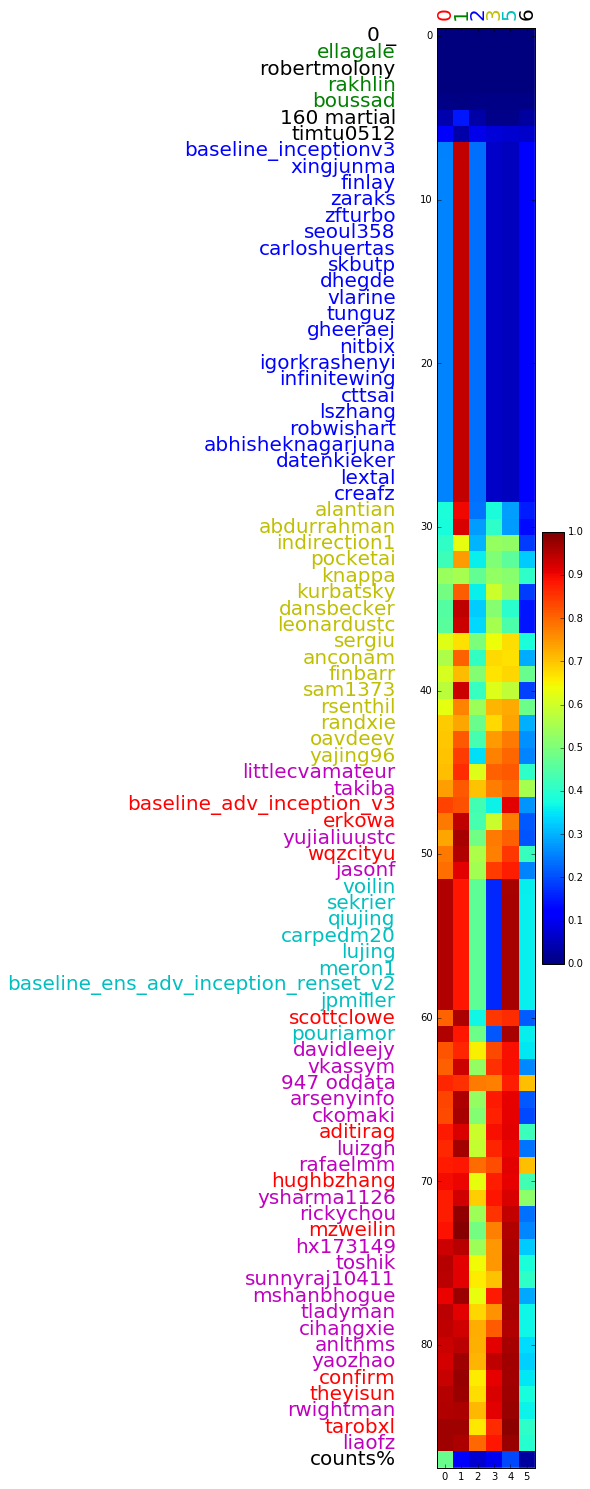

In [25]:
## plot df_means_valid

# plot parameters
ftsz = 20 # font size to show team names

# initialize plot
fig = plt.figure(figsize=(2,20))
ax = fig.add_axes([0,0,1,1])

# labels
i = 0
for row in df_means_valid.index[:-1]:
    ax.text(-3, i, row, fontsize=ftsz, color=cluster_colors[df_i[i]],
            horizontalalignment='right', verticalalignment='center')
    i += 1
ax.text(-3, i, 'counts%', fontsize=ftsz, color='k',
        horizontalalignment='right', verticalalignment='center')

j = 0
for column in df_means_valid.columns:
    ax.text(j, -1, column, fontsize=ftsz, color=cluster_colors[column],
        rotation='vertical', verticalalignment='bottom', horizontalalignment='center')
    j += 1

# data
plt.imshow(df_means_valid, cmap='jet', interpolation='none')
plt.colorbar()
plt.clim(0, 1)

fig.savefig('df_means_valid.png', bbox_inches='tight')
plt.show()

In [26]:
## save stats
ntg_atk_sums_all.to_csv('ntg_atk_sums_all.csv')
ntg_atk_means_all.to_csv('ntg_atk_means_all.csv')
ntg_atk_sums_valid.to_csv('ntg_atk_sums_valid.csv')
ntg_atk_means_valid.to_csv('ntg_atk_means_valid.csv')
df_sums_all.to_csv('df_sums_all.csv')
df_means_all.to_csv('df_means_all.csv')
df_sums_valid.to_csv('df_sums_valid.csv')
df_means_valid.to_csv('df_means_valid.csv')